In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import predictions as pr

In [2]:
df_nem = pr("nem_price.csv")
df_nem.data = df_nem.data.reindex(index=df_nem.data.index[::-1])

                Open      High       Low     Close  Volume Market Cap  \
2015-04-01  0.000400  0.000458  0.000170  0.000242  65,525  36,04,110   
2015-04-02  0.000242  0.000323  0.000227  0.000314  28,549  21,79,320   
2015-04-03  0.000309  0.000330  0.000291  0.000310  20,678  27,78,750   
2015-04-04  0.000310  0.000318  0.000251  0.000277  23,550  27,92,120   
2015-04-05  0.000272  0.000283  0.000218  0.000232  26,800  24,43,720   

                Mean  
2015-04-01  0.000317  
2015-04-02  0.000276  
2015-04-03  0.000310  
2015-04-04  0.000289  
2015-04-05  0.000251  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1057 entries, 2015-04-01 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          1057 non-null float64
High          1057 non-null float64
Low           1057 non-null float64
Close         1057 non-null float64
Volume        1057 non-null object
Market Cap    1057 non-null object
Mean         

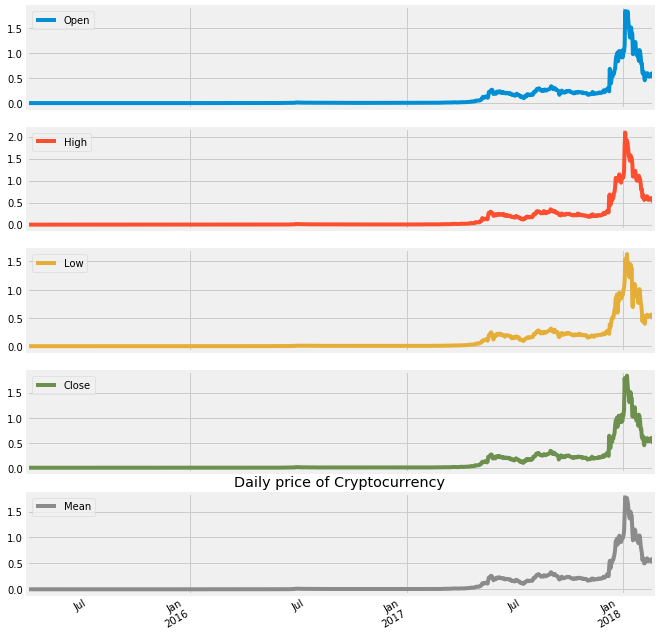

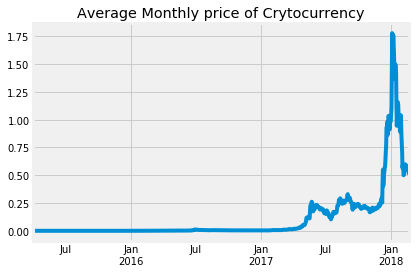

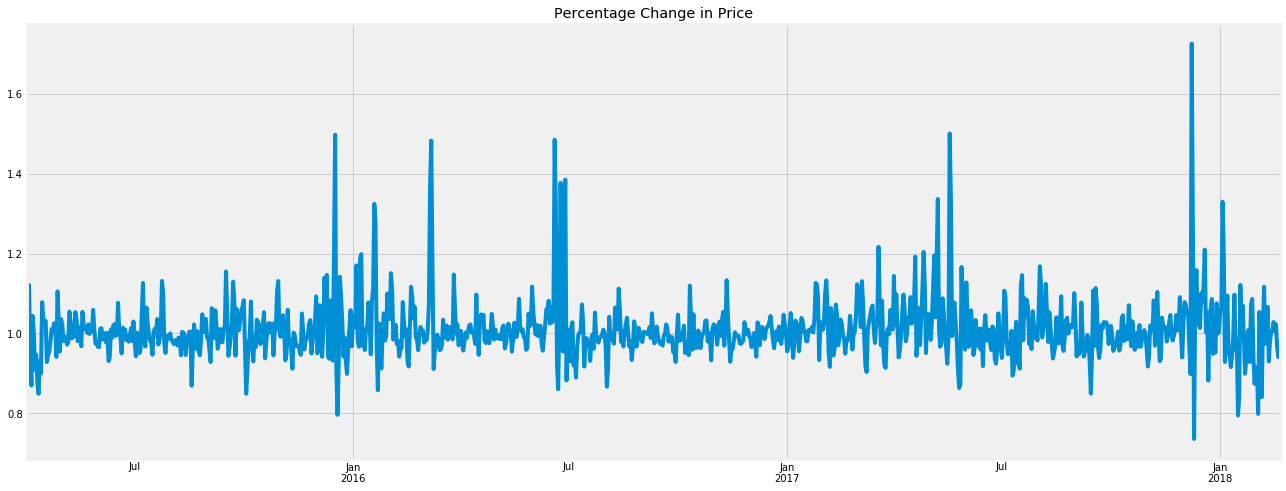

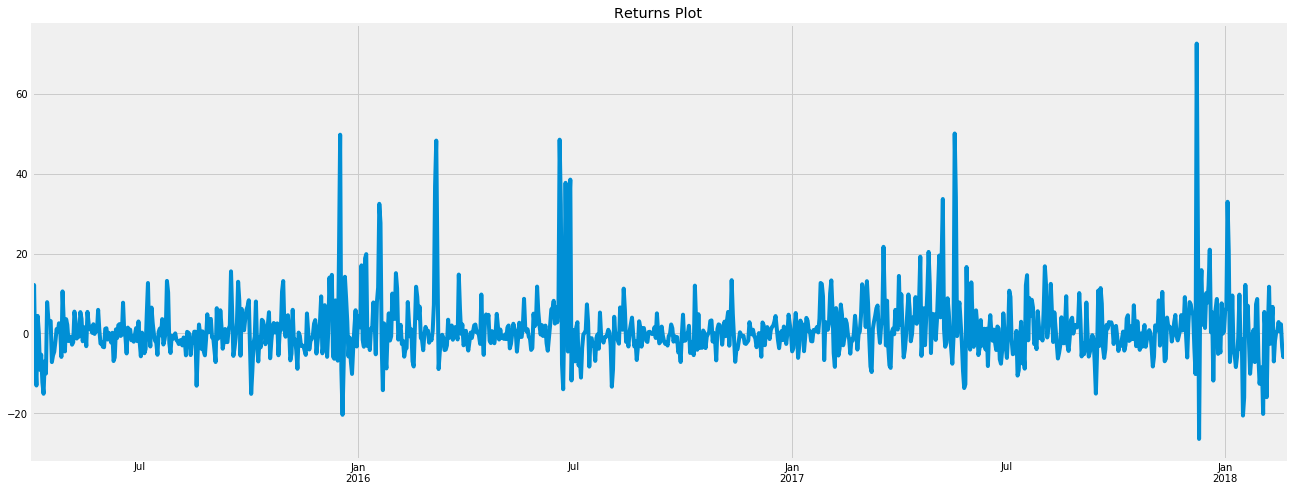

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


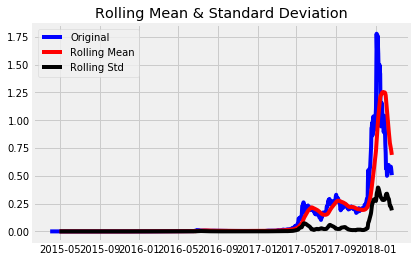

Results of Dickey-Fuller Test
Test Statistic                   -2.818192
p-value                           0.055722
#Lags Used                       22.000000
Number of Observations Used    1034.000000
Critical Value(1%)               -3.436690
Critical Value(5%)               -2.864339
Critical Value(10%)              -2.568260
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            1.909624
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.114
P-value                         0.239
Lags                               22
-----------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_nem.description()
df_nem.missing()
df_nem.plot_daily()
df_nem.plot_monthly()
df_nem.Percent_change()
df_nem.Returns()
df_nem.stationarity_test()

In [4]:
df_nem.data = df_nem.data['2017-01-01':]

In [6]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
nem_sarima = produce_predict(df_nem.data)

In [7]:
nem_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:502.38239349272686
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:287.53280139979836
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:254.80443080677574
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:210.4560186196639
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:228.62451675001535
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:120.36365241118773
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:222.89062962173426


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:226.77689229863716
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:-47.4658013192726
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:-203.59643622065244
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:-228.80658806216616
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:-242.999093325304
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:-262.2018413852144
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:-359.0155554389156
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:-231.87954667037457


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:-225.7767588226109
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:-1431.0009440925287
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:-1296.6580240097871
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:-1046.2758719336434
ARIMA(0, 1, 0)x(0, 1, 1, 30) - AIC:-1136.3678234513714
ARIMA(0, 1, 0)x(1, 0, 0, 30) - AIC:-1301.1060005656414
ARIMA(0, 1, 0)x(1, 0, 1, 30) - AIC:-1294.7234848686849


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 30) - AIC:-1120.909285688604
ARIMA(0, 1, 0)x(1, 1, 1, 30) - AIC:-1145.049659243907
ARIMA(0, 1, 1)x(0, 0, 0, 30) - AIC:-1472.7806523618433
ARIMA(0, 1, 1)x(0, 0, 1, 30) - AIC:-1334.826145928842
ARIMA(0, 1, 1)x(0, 1, 0, 30) - AIC:-1105.550522293685
ARIMA(0, 1, 1)x(0, 1, 1, 30) - AIC:-1177.4784155153231
ARIMA(0, 1, 1)x(1, 0, 0, 30) - AIC:-1343.7144971140888
ARIMA(0, 1, 1)x(1, 0, 1, 30) - AIC:-1332.862916218743
ARIMA(0, 1, 1)x(1, 1, 0, 30) - AIC:-1162.0328869179612
ARIMA(0, 1, 1)x(1, 1, 1, 30) - AIC:-1180.996749495263
ARIMA(1, 0, 0)x(0, 0, 0, 30) - AIC:-1433.8934420176965


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:-1296.9021939861027
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:-1049.768383546076
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:-1141.1026448414796
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:-1299.4265254636684
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:-1297.4320176117972
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:-1120.1032679401364
ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:-1114.413443544157
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:-1476.331415986941


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:-1338.0347581837807
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:-1111.5433039713146
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:-1182.2537778255348
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:-1342.8690796650453
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:-1336.3679883019174
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:-1162.6174412056503


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:-1150.4500785850335
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:-1460.7625665919527
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:-1324.0135212553953


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:-1101.2107852396693
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:-1169.2223303981611


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:-1324.0634805195493
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:-1322.0700310882398
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:-1146.8683283098544
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:-1172.6423297928206
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:-1475.6455766354602
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:-1337.1374903070437


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:-1103.5510613358563
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:-1177.5423643831887
ARIMA(1, 1, 1)x(1, 0, 0, 30) - AIC:-1341.641760899693
ARIMA(1, 1, 1)x(1, 0, 1, 30) - AIC:-1335.1294248832683
ARIMA(1, 1, 1)x(1, 1, 0, 30) - AIC:-1158.0237148301128
ARIMA(1, 1, 1)x(1, 1, 1, 30) - AIC:-1181.8017399733299


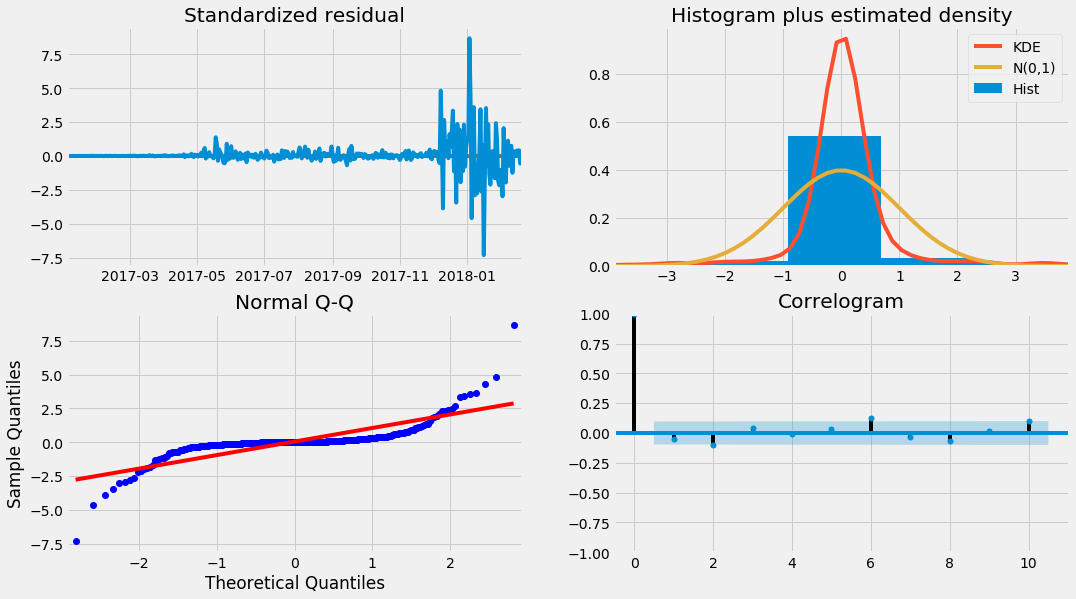

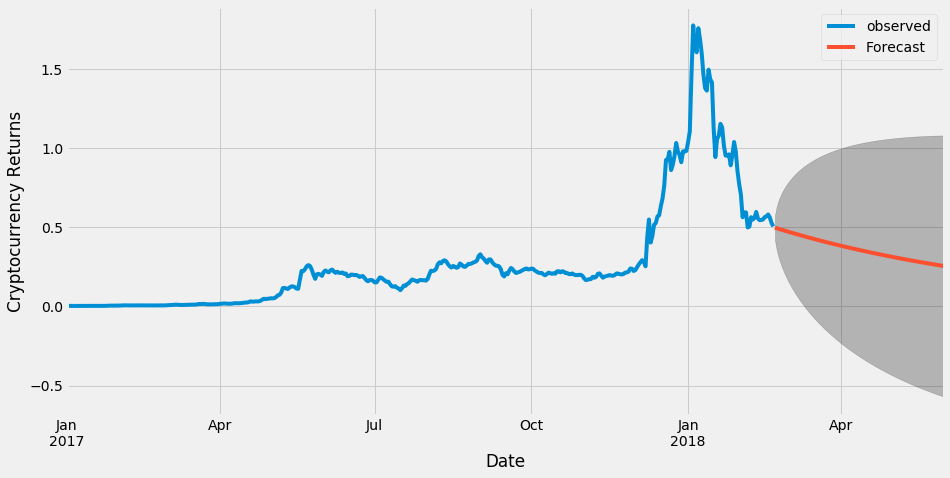

In [9]:
nem_sarima.sarima_model((1,0,1),(0,0,0,30))
nem_sarima.diagnostics()
nem_sarima.produce_forecast()

In [10]:
from fbprophet import Prophet
from prophet_model import *
nem_pro = prophet_model("nem_price.csv",641)

<Figure size 1296x432 with 0 Axes>

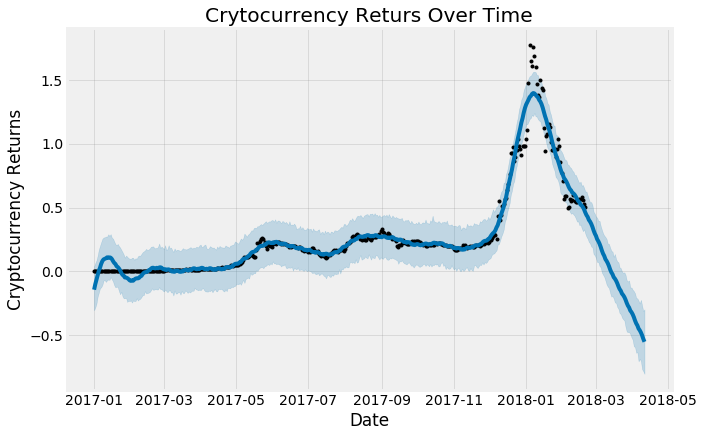

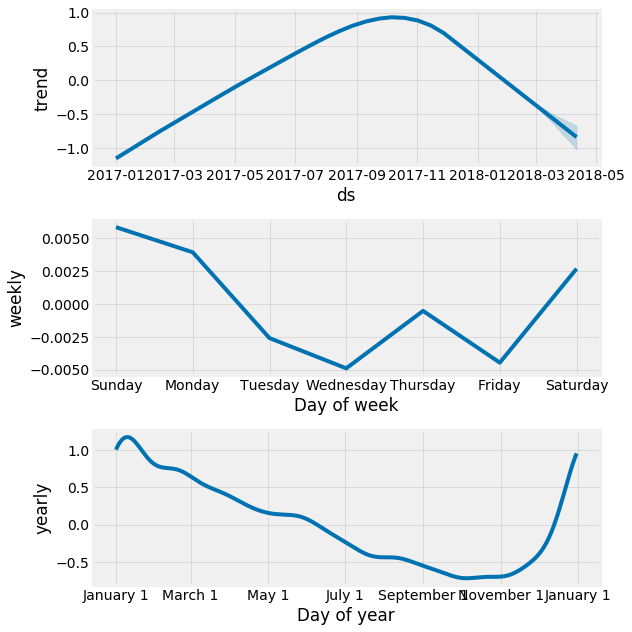

In [11]:
nem_pro.model()
nem_pro.forecast()
nem_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_nem.data)

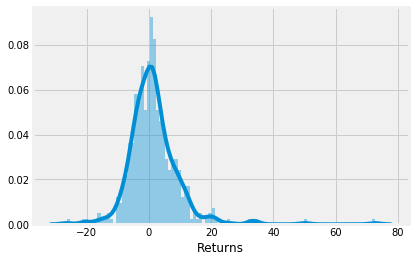

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -9.13034
95%                          -12.1429
99%                          -17.794


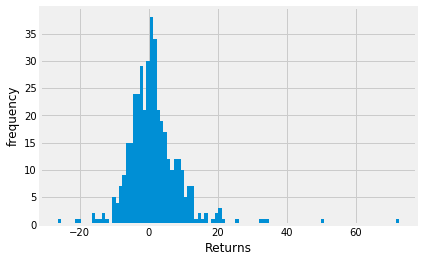

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -6.08907
95%                           -8.40392
99%                          -15.848


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  76.75333371066148
